<a href="https://colab.research.google.com/github/lisphilar/r_language/blob/main/FitzHugh_Nagumo_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages("deSolve")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [7]:
install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’




In [9]:
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
library(deSolve)
library(ggplot2)
library(reshape2)
library(gridExtra)
library(plyr)

In [11]:
tsg <- function(time.series,time.name="time",
              title="ODE analysis",xlab="Time",ylab="values",
              legend.position=c(0.88,0.85),background.bw="no"){
  time.series<-data.frame(time.series)
  time.series.melt<-melt(time.series,id=time.name,variable.name="Groups")
  g<-ggplot(time.series.melt,
            aes(x=time,y=value,colour=Groups,group=Groups))
  g<-g+geom_line()+labs(list(title=title,x=xlab,y=ylab))
  g<-g+theme(legend.position=legend.position)
  if(background.bw!="no"){
    g<-g+theme_bw()
  }
  g
}

In [12]:
FN_model<-function(time,state,pars){
  with(as.list(c(state,pars)),{
    dx<-x*(x-a)*(1-x)-y+I
    dy<-(x-b*y)/tau
    return(list(c(dx,dy)))
  })
}

In [13]:
pars<-c(a=0.1,b=0.5,tau=100,I=0.020)
yini<-c(x=0,y=0)
times<-seq(0,1000,by=0.2)
out<-ode(func=FN_model,y=yini,parms=pars,times=times)
out<-data.frame(out)
colnames(out)<-c("time","voltage","refractoriness")
str(out)

'data.frame':	5001 obs. of  3 variables:
 $ time          : num  0 0.2 0.4 0.6 0.8 1 1.2 1.4 1.6 1.8 ...
 $ voltage       : num  0 0.00396 0.00785 0.01167 0.01543 ...
 $ refractoriness: num  0.00 3.96e-06 1.58e-05 3.53e-05 6.23e-05 ...


In [14]:
pars2<-c(a=0.1,b=0.5,tau=100,I=0)
yini2<-c(x=out[nrow(out),"voltage"],y=out[nrow(out),"refractoriness"])
times2<-seq(0,500,by=0.2)
out2<-ode(func=FN_model,y=yini2,parms=pars2,times=times2)
out2<-data.frame(out2)
colnames(out2)<-c("time","voltage","refractoriness")
str(out2)

'data.frame':	2501 obs. of  3 variables:
 $ time          : num  0 0.2 0.4 0.6 0.8 1 1.2 1.4 1.6 1.8 ...
 $ voltage       : num  0.00957 0.0056 0.00171 -0.00211 -0.00585 ...
 $ refractoriness: num  0.0191 0.0191 0.0191 0.0191 0.0191 ...


In [15]:
output<-rbind(out,out2)

In [16]:
p<-tsg(time.series=output[1:nrow(output)/6,],
    title="FitzHugh-Nagumo Model",
    xlab="Time",ylab="Concentrations",legend.position=c(0.68,0.85))

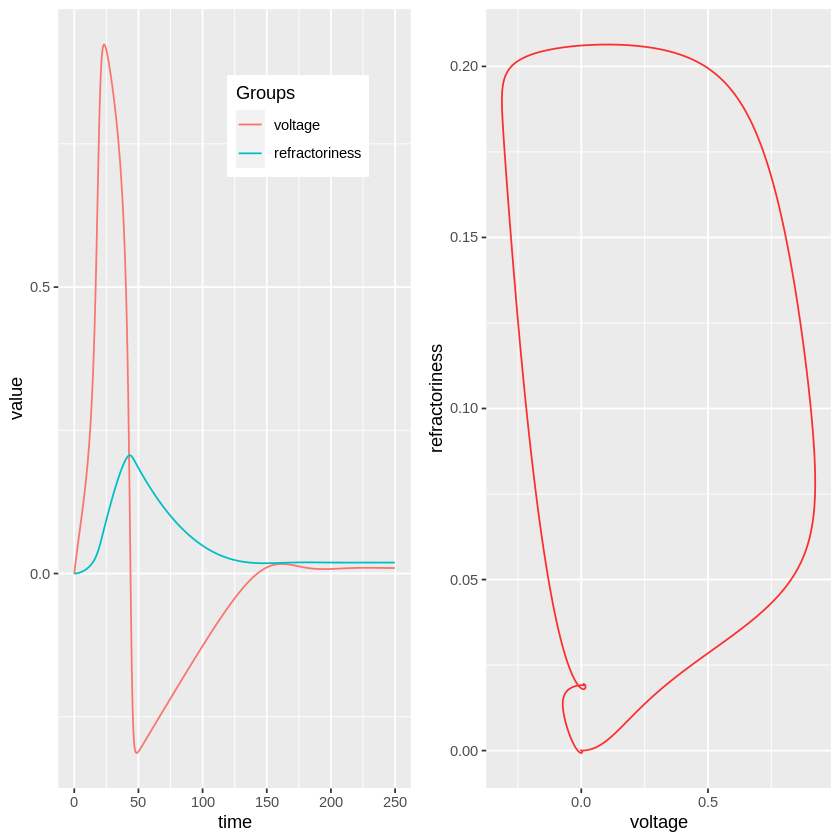

In [17]:
w<-ggplot(output,aes(voltage,refractoriness))
w<-w+geom_path(colour="red",alpha=0.8)
w<-w+labs(list(title="Phase Plane analysis",x="voltage",y="refractoriness"))
grid.arrange(p,w,ncol=2)